In [7]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os, shutil
from helpers import *

In [4]:
ori_train_dir = '/media/storage/hdd_bair/BraTS24/MICCAI-BraTS2024-MET-Challenge-TrainingData'
ori_val_dir   = '/media/storage/hdd_bair/BraTS24/MICCAI-BraTS2024-MET-Challenge-Validation'
MODALITIES    = ['t1c', 't1n', 't2f', 't2w']

def get_ori_paths(data_dir):
    ids = os.listdir(data_dir)
    id_paths = [os.path.join(data_dir, id_) for id_ in ids]
    images_fps = []
    labels_fps = []

    for id_, id_path in zip(ids, id_paths):
        fns = os.listdir(id_path)
        for fn in fns:
            fp = os.path.join(data_dir, id_, fn)
            if 'seg' in fn:
                labels_fps.append(fp)
            else:
                images_fps.append(fp)
    return images_fps, labels_fps

# Get train ids and filepaths for original data
ori_train_images_fps, ori_train_labels_fps = get_ori_paths(ori_train_dir)
print(f'{len(ori_train_images_fps)} training images, {len(ori_train_labels_fps)} training labels.')

# Get val ids and filepaths for original data
ori_val_images_fps, _ = get_ori_paths(ori_val_dir)
print(f'{len(ori_val_images_fps)} validation images.')

2608 training images, 652 training labels.
352 validation images.


In [17]:
# Define paths to save nnUNet_raw
data_dir = '/media/storage/luu/nnUNet_raw/Dataset111_Meta'
imagesTr = os.path.join(data_dir, 'imagesTr')
labelsTr = os.path.join(data_dir, 'labelsTr')
imagesTs = os.path.join(data_dir, 'imagesTs')

# Copying original paths to nnUNet format paths
channel_names_dict = {
    't1c': '0000',
    't1n': '0001',
    't2f': '0002',
    't2w': '0003'
}

def to_nnunet_path(fp, phase='train'):
    fn = os.path.basename(fp)
    modality = fn.split('-')[-1][:3]
    id_ = fn.replace(f'-{modality}.nii.gz', '')

    new_fp = None
    if modality == 'seg':
        new_fn = f'{id_}.nii.gz'
        new_fp = os.path.join(labelsTr, new_fn)
    else:
        channel_name = channel_names_dict[modality]
        new_fn = f'{id_}_{channel_name}.nii.gz'
        dir_ = imagesTr if phase == 'train' else imagesTs
        new_fp = os.path.join(dir_, new_fn)

    return new_fp

In [18]:
# Create paths for preprocessed images from the original data paths
pp_train_images_fps = [to_nnunet_path(fp, phase='train') for fp in ori_train_images_fps]
pp_train_labels_fps = [to_nnunet_path(fp, phase='train') for fp in ori_train_labels_fps]
pp_val_images_fps   = [to_nnunet_path(fp, phase='test') for fp in ori_val_images_fps]

print(f'{len(pp_train_images_fps)} preprocessed training images.')
print(f'{len(pp_train_labels_fps)} preprocessed training labels.')
print(f'{len(pp_val_images_fps)} preprocessed validation images.')

2608 preprocessed training images.
652 preprocessed training labels.
352 preprocessed validation images.


In [19]:
ori_train_images_fps[0], ori_train_labels_fps[0], pp_train_images_fps[0], pp_train_labels_fps[0]

('/media/storage/hdd_bair/BraTS24/MICCAI-BraTS2024-MET-Challenge-TrainingData/BraTS-MET-00559-000/BraTS-MET-00559-000-t1c.nii.gz',
 '/media/storage/hdd_bair/BraTS24/MICCAI-BraTS2024-MET-Challenge-TrainingData/BraTS-MET-00559-000/BraTS-MET-00559-000-seg.nii.gz',
 '/media/storage/luu/nnUNet_raw/Dataset111_Meta/imagesTr/BraTS-MET-00559-000_0000.nii.gz',
 '/media/storage/luu/nnUNet_raw/Dataset111_Meta/labelsTr/BraTS-MET-00559-000.nii.gz')

In [20]:
# Copy train images
for src, dst in zip(ori_train_images_fps, pp_train_images_fps):
    shutil.copyfile(src, dst)

In [21]:
# Copy train labels
for src, dst in zip(ori_train_labels_fps, pp_train_labels_fps):
    shutil.copyfile(src, dst)

In [22]:
# Copy val images
for src, dst in zip(ori_val_images_fps, pp_val_images_fps):
    shutil.copyfile(src, dst)

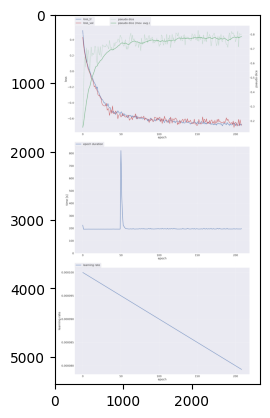

In [1]:
import os
import matplotlib.pyplot as plt

#pth = '/media/storage/luu/nnUNet_results/Dataset111_Meta/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/fold_0/progress.png'
#pth = '/media/storage/luu/nnUNet_results/Dataset999_Metastases/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/fold_1/progress.png'
#pth = '/media/storage/luu/nnUNet_results/Dataset111_Meta/nnUNetTrainerSegResNet__nnUNetPlans__3d_fullres/fold_0/progress.png'
pth = '/media/storage/luu/nnUNet_results/Dataset111_Meta/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/progress.png'
img = plt.imread(pth)
plt.tight_layout()
plt.imshow(img)

#plt.savefig('progress_umambabot_fold0.png', dpi=720)
#plt.savefig('progress_umambabot_fold1_reorient.png', dpi=720)
#plt.savefig('progress_segresnet_fold0.png', dpi=720)
plt.savefig('progress_unet_fold0.png', dpi=720)

In [26]:
# Check oritentation of prediction files
test_dir = '/media/storage/luu/nnUNet_raw/Dataset999_Metastases/imagesTs'
test_fns = [fn for fn in os.listdir(test_dir) if '_0003.nii.gz' in fn]
test_fps = [os.path.join(test_dir, fn) for fn in test_fns]
print(len(test_fps))

pred_dir = '/media/storage/luu/nnUNet_predictions/Dataset111_Meta/nnUNetTrainerSegResNet__nnUNetPlans__3d_fullres/fold_0'
pred_fns = [fn for fn in os.listdir(pred_dir) if fn.startswith('BraTS')]
pred_fps = [os.path.join(pred_dir, fn) for fn in pred_fns]
print(len(pred_fps))

88
88


In [19]:
test_nifti_details = [get_nifti_details_for_one_file(fp) for fp in test_fps]
test_df = pd.DataFrame(test_nifti_details)

pred_nifti_details = [get_nifti_details_for_one_file(fp) for fp in pred_fps]
pred_df = pd.DataFrame(pred_nifti_details)
pred_df.shape

In [11]:
pred_df['shape'].value_counts()

shape
(240, 240, 155)    88
Name: count, dtype: int64

In [12]:
pred_df['orientation'].value_counts()

orientation
(R, A, S)    88
Name: count, dtype: int64

In [14]:
pred_df['spacing'].value_counts()

spacing
(1.0, 1.0, 1.0)    88
Name: count, dtype: int64

In [20]:
test_df['shape'].value_counts()

shape
(240, 240, 155)    88
Name: count, dtype: int64

In [21]:
test_df['orientation'].value_counts()

orientation
(R, A, S)    88
Name: count, dtype: int64

In [22]:
test_df['spacing'].value_counts()

spacing
(1.0, 1.0, 1.0)    88
Name: count, dtype: int64

0.0: 8843388
1.0: 61201
2.0: 390
3.0: 23021


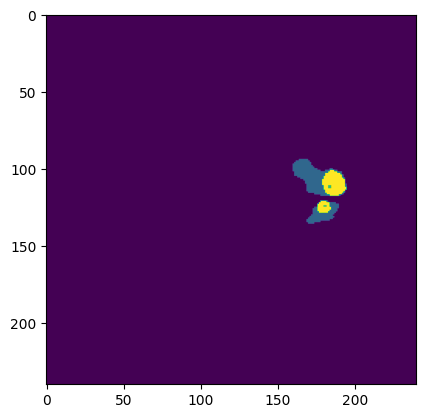

In [42]:
# Visualize prediction
pred_img = nib.load(pred_fps[-1]).get_fdata()
plt.imshow(pred_img[..., 100])

# Count unique values of labels
unique_values, counts = np.unique(pred_img, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")